<a href="https://colab.research.google.com/github/karthikeyan0726/group_ML/blob/main/AML_GroupProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("/content/Syner&Antag_voting.csv")

In [ ]:
data.head()

ID Drug1    Drug2 Cell line    ZIP  Bliss  Loewe    HSA  ZIPclassification  \
0   1  5-FU  ABT-888     A2058   5.88  12.33   3.33  11.61                  1   
1   2  5-FU  ABT-888     A2058   3.59  11.66   2.65  10.94                  1   
2   3  5-FU  AZD1775     A2058  12.29  15.77  10.40  18.66                  1   
3   4  5-FU  AZD1775     A2058   7.64   6.52   1.15   9.41                  1   
4   5  5-FU  AZD1775     A2058  14.79  15.18   9.81  18.07                  1   

   blissclassification  loeweclassification  hsaclassification  synthetic  \
0                    1                    1                  1          4   
1                    1                    1                  1          4   
2                    1                    1                  1          4   
3                    1                    1                  1          4   
4                    1                    1                  1          4   

  classification  
0        synergy  
1        synergy  
2        synergy  
3        synergy  
4        synergy

In [ ]:
data.tail()

ID                Drug1      Drug2 Cell line    ZIP  Bliss  \
240971  240972            Efavirenz  ibrutinib      TMD8 -1.174 -4.829   
240972  240973             Ivachtin  ibrutinib      TMD8 -2.095 -4.509   
240973  240974         NCGC00262398  ibrutinib      TMD8 -3.170 -5.464   
240974  240975  BTM-2C-dimer ketone  ibrutinib      TMD8  4.714  1.845   
240975  240976          Vemurafenib  Dasatinib   MMAC-SF -0.771 -0.831   

         Loewe    HSA  ZIPclassification  blissclassification  \
240971 -37.481 -4.409                 -1                   -1   
240972 -25.827 -3.191                 -1                   -1   
240973 -24.472 -2.288                 -1                   -1   
240974   0.884  8.416                  1                    1   
240975  -0.117 -0.014                 -1                   -1   

        loeweclassification  hsaclassification  synthetic classification  
240971                   -1                 -1         -4     antagonism  
240972                   -1                 -1         -4     antagonism  
240973                   -1                 -1         -4     antagonism  
240974                    1                  1          4        synergy  
240975                   -1                 -1         -4     antagonism

In [ ]:
data.isnull().sum()

ID                     0
Drug1                  1
Drug2                  1
Cell line              0
ZIP                    0
Bliss                  0
Loewe                  1
HSA                    0
ZIPclassification      0
blissclassification    0
loeweclassification    0
hsaclassification      0
synthetic              0
classification         0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240976 entries, 0 to 240975
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   240976 non-null  int64  
 1   Drug1                240975 non-null  object 
 2   Drug2                240975 non-null  object 
 3   Cell line            240976 non-null  object 
 4   ZIP                  240976 non-null  float64
 5   Bliss                240976 non-null  float64
 6   Loewe                240975 non-null  float64
 7   HSA                  240976 non-null  float64
 8   ZIPclassification    240976 non-null  int64  
 9   blissclassification  240976 non-null  int64  
 10  loeweclassification  240976 non-null  int64  
 11  hsaclassification    240976 non-null  int64  
 12  synthetic            240976 non-null  int64  
 13  classification       240976 non-null  object 
dtypes: float64(4), int64(6), object(4)
memory usage: 25.7+ MB


In [ ]:
data.fillna(0, inplace=True)
data = data.dropna()

In [ ]:
data.isnull().sum()

ID                     0
Drug1                  0
Drug2                  0
Cell line              0
ZIP                    0
Bliss                  0
Loewe                  0
HSA                    0
ZIPclassification      0
blissclassification    0
loeweclassification    0
hsaclassification      0
synthetic              0
classification         0
dtype: int64

In [ ]:
print(data.describe())

                  ID           ZIP         Bliss          Loewe  \
count  240976.000000  2.409760e+05  2.409760e+05  240976.000000   
mean   120488.500000  1.853389e+01  1.871580e+01      -6.223472   
std     69563.923572  4.142303e+03  4.173713e+03      39.838781   
min         1.000000 -2.166267e+05 -2.212329e+05   -9663.379000   
25%     60244.750000 -6.730000e+00 -6.680000e+00     -11.630000   
50%    120488.500000 -2.150000e+00 -2.290000e+00      -4.120000   
75%    180732.250000  2.840000e+00  4.060000e+00       2.800000   
max    240976.000000  1.444929e+06  1.449994e+06    2696.264000   

                 HSA  ZIPclassification  blissclassification  \
count  240976.000000      240976.000000        240976.000000   
mean       -0.448198          -0.293062            -0.292901   
std        40.896043           0.955646             0.955871   
min    -11718.486000          -1.000000            -1.000000   
25%        -5.000000          -1.000000            -1.000000   
50%        -

In [ ]:
# Convert 'Drug1', 'Drug2', and 'Cell line' columns to strings
data['Drug1'] = data['Drug1'].astype(str)
data['Drug2'] = data['Drug2'].astype(str)
data['Cell line'] = data['Cell line'].astype(str)

# Apply LabelEncoder
le = LabelEncoder()
data['Drug1'] = le.fit_transform(data['Drug1'])
data['Drug2'] = le.fit_transform(data['Drug2'])
data['Cell line'] = le.fit_transform(data['Cell line'])


In [ ]:

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['ID', 'ZIPclassification', 'blissclassification', 'loeweclassification', 'hsaclassification', 'synthetic', 'classification'])
y = data['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model 1: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # Added class_weight
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", report_rf)

Random Forest:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

  antagonism       1.00      1.00      1.00     31105
     synergy       1.00      1.00      1.00     17091

    accuracy                           1.00     48196
   macro avg       1.00      1.00      1.00     48196
weighted avg       1.00      1.00      1.00     48196



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Perform Parameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_grid=param_grid_rf,
                               scoring='accuracy',
                               cv=5,
                               n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

In [ ]:
# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("\nBest Parameters for Random Forest:")
print(best_params_rf)

# Refit the model with the best parameters
best_rf_clf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_clf.predict(X_test)

# Evaluate accuracy after tuning
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy after tuning: {accuracy_best_rf:.2f}")


Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy after tuning: 1.00


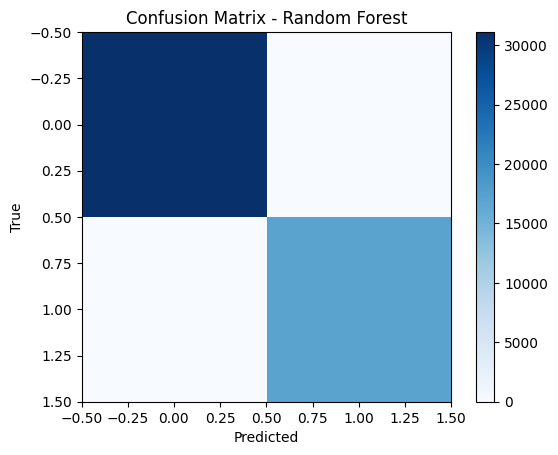

In [ ]:
# Plot Confusion Matrix for Random Forest
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Logistic Regression:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

  antagonism       1.00      1.00      1.00     31105
     synergy       1.00      1.00      1.00     17091

    accuracy                           1.00     48196
   macro avg       1.00      1.00      1.00     48196
weighted avg       1.00      1.00      1.00     48196



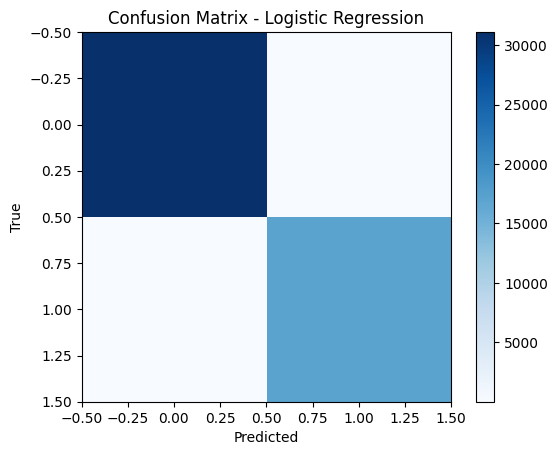

In [ ]:
# Model 2: Logistic Regression
lr_clf = LogisticRegression(random_state=42, class_weight='balanced')  # Added class_weight
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_lr:.2f}")
print("Classification Report:\n", report_lr)

# Plot Confusion Matrix for Logistic Regression
plt.imshow(cm_lr, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Perform Parameter Tuning for Logistic Regression (you can customize the parameters based on your dataset)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


In [ ]:
grid_search_lr = GridSearchCV(estimator=LogisticRegression(random_state=42),
                               param_grid=param_grid_lr,
                               scoring='accuracy',
                               cv=5,
                               n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_
print("\nBest Parameters for Logistic Regression:")
print(best_params_lr)

# Refit the model with the best parameters
best_lr_clf = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_clf.predict(X_test)

# Evaluate accuracy after tuning
accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
print(f"Accuracy after tuning: {accuracy_best_lr:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve


Best Parameters for Logistic Regression:
{'C': 100, 'penalty': 'l2'}
Accuracy after tuning: 1.00


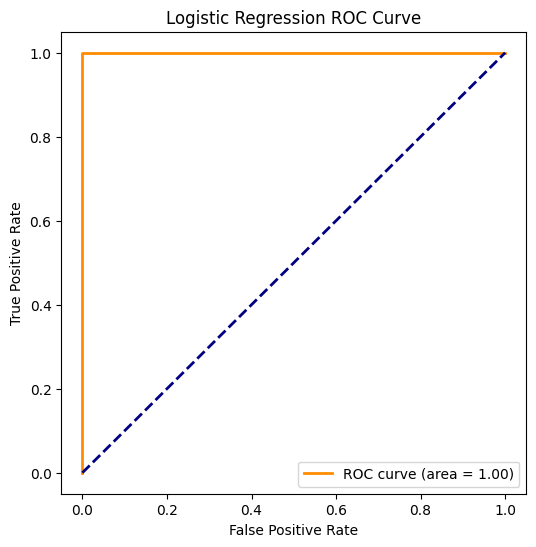

In [ ]:
from sklearn.preprocessing import label_binarize

# Encode categorical labels to binary
y_test_binary = label_binarize(y_test, classes=['antagonism', 'synergy'])

# ROC Curve for Logistic Regression:
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, lr_clf.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_knn = knn_clf.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:\n", report_knn)


In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 0.9994190389243921

SVM Classification Report:
               precision    recall  f1-score   support

  antagonism       1.00      1.00      1.00     31105
     synergy       1.00      1.00      1.00     17091

    accuracy                           1.00     48196
   macro avg       1.00      1.00      1.00     48196
weighted avg       1.00      1.00      1.00     48196



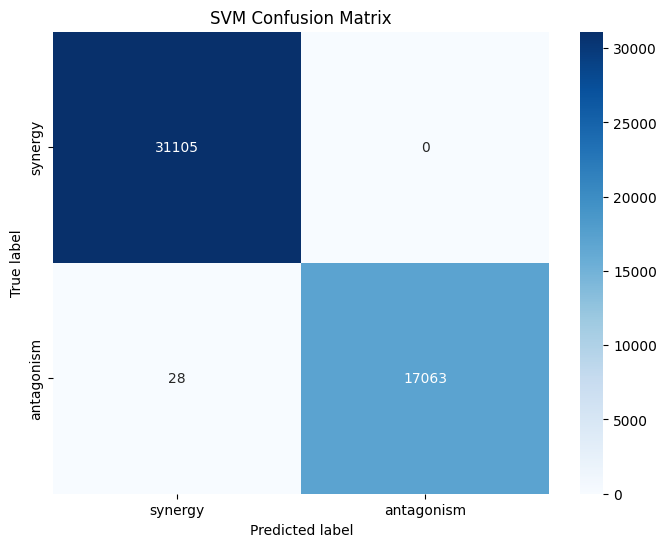

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)

labels = list(set(y_test))  # Replace with your actual class labels if they are available

# Create a DataFrame from the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix_svm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap="Blues")
heatmap.set_title('SVM Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(estimator=SVC(random_state=42),
                               param_grid=param_grid_svm,
                               scoring='accuracy',
                               cv=5,
                               n_jobs=-1)

In [ ]:
grid_search_svm.fit(X_train, y_train)
# Get the best parameters
best_params_svm = grid_search_svm.best_params_
print("\nBest Parameters for SVM:")
print(best_params_svm)

# Refit the model with the best parameters
best_svm_model = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)

# Evaluate accuracy after tuning
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"Accuracy after tuning: {accuracy_best_svm:.2f}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("Classification Report:\n", report_dt)


Decision Tree:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

  antagonism       1.00      1.00      1.00     31105
     synergy       1.00      1.00      1.00     17091

    accuracy                           1.00     48196
   macro avg       1.00      1.00      1.00     48196
weighted avg       1.00      1.00      1.00     48196



In [ ]:
from sklearn.cluster import KMeans
# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['Drug1', 'Drug2', 'Cell line'], drop_first=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


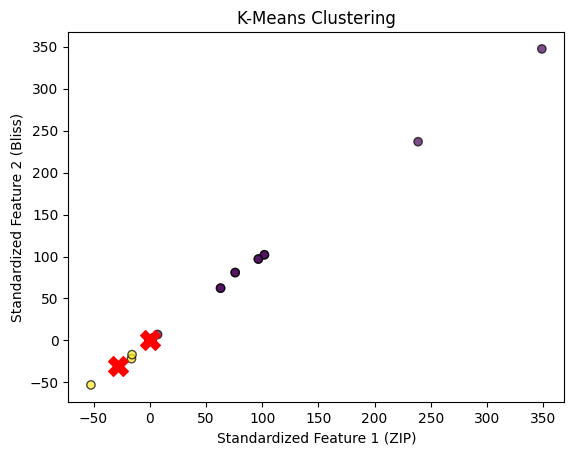

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numerical columns for clustering
numerical_columns = ['ZIP', 'Bliss', 'Loewe', 'HSA']

# Extract numerical features for clustering
X_clustering = data[numerical_columns]

# Standardize the features for clustering
scaler = StandardScaler()
X_clustering_standardized = scaler.fit_transform(X_clustering)

# Determine the number of clusters (you can adjust the value of n_clusters)
n_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_clustering_standardized)

# Visualize the clusters
plt.scatter(X_clustering_standardized[:, 0], X_clustering_standardized[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('K-Means Clustering')
plt.xlabel('Standardized Feature 1 (ZIP)')
plt.ylabel('Standardized Feature 2 (Bliss)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


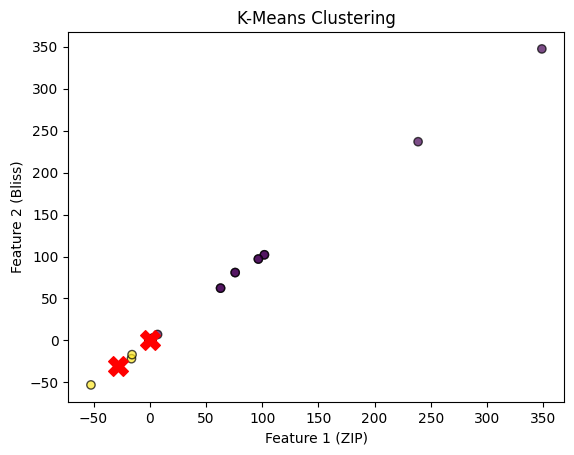

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Select numerical columns for clustering
numerical_columns = ['ZIP', 'Bliss', 'Loewe', 'HSA']

# Extract numerical features for clustering
X_clustering = data[numerical_columns]

# Standardize the features for clustering
scaler = StandardScaler()
X_clustering_standardized = scaler.fit_transform(X_clustering)

# Determine the number of clusters (you can adjust the value of n_clusters)
n_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_clustering_standardized)

# Visualize the clusters
plt.scatter(X_clustering_standardized[:, 0], X_clustering_standardized[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1 (ZIP)')
plt.ylabel('Feature 2 (Bliss)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

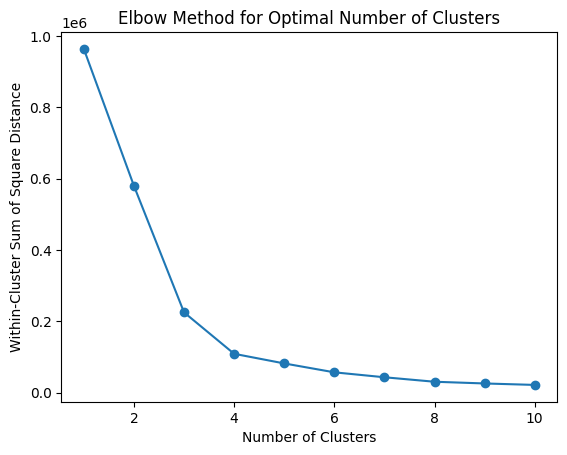

In [ ]:
# Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of square distances

# Experiment with different values of clusters (e.g., from 1 to 10)
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_clustering_standardized)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square Distance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


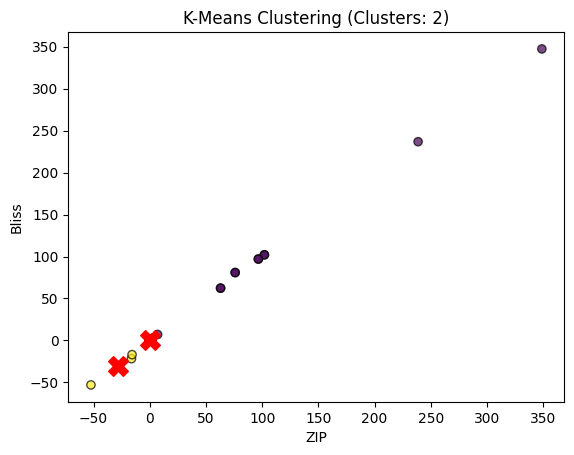

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


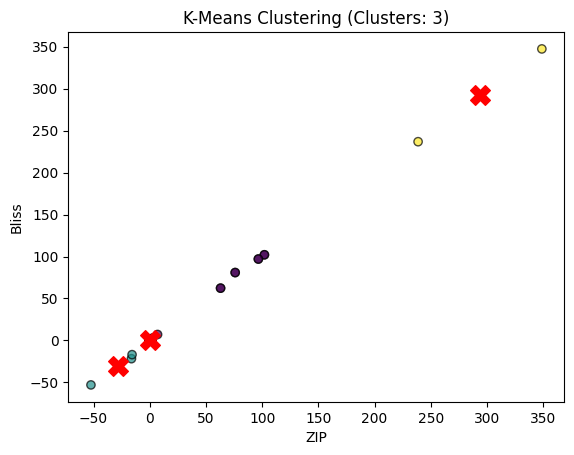

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


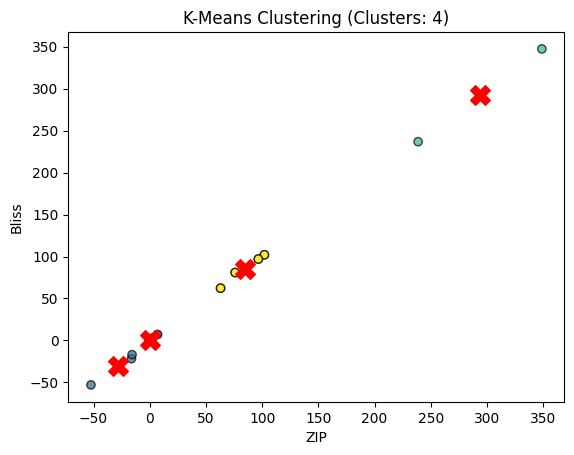

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


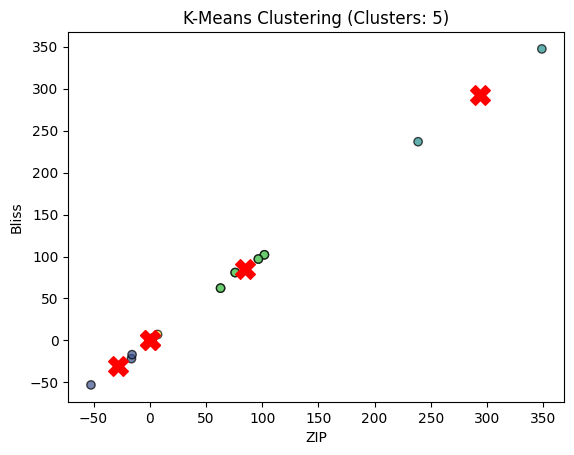

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


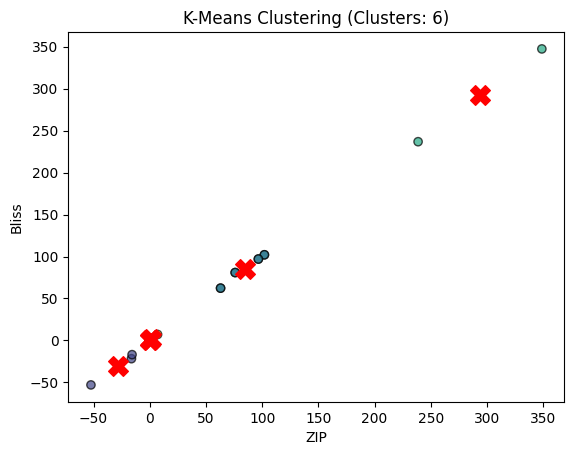

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


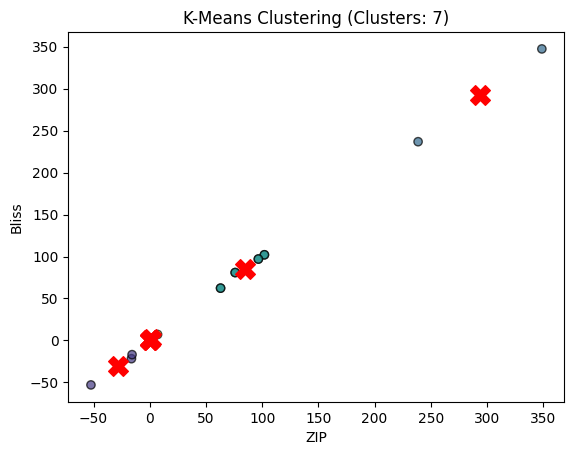

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


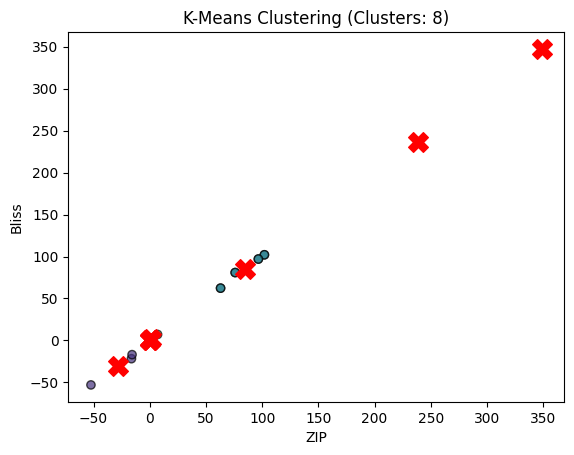

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


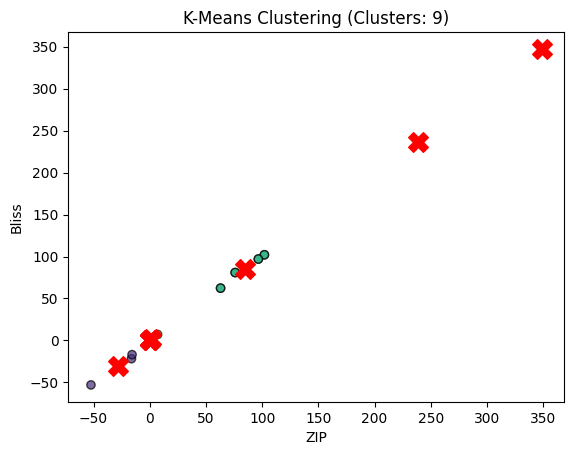

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


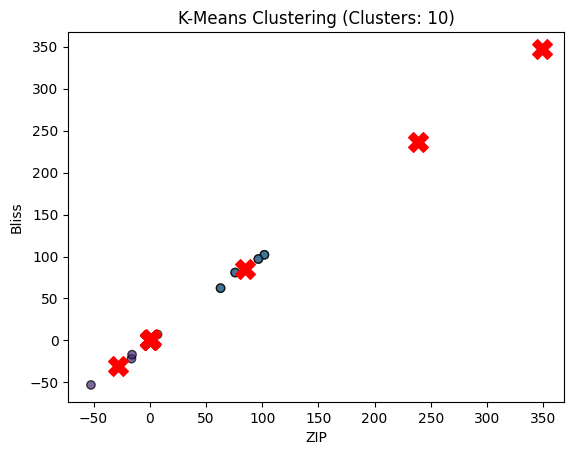

In [ ]:
from sklearn.cluster import KMeans

# Assuming X_clustering_standardized is your feature matrix
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_clustering_standardized)

    # Visualize the clusters
    plt.scatter(X_clustering_standardized[:, 0], X_clustering_standardized[:, 1], c=kmeans.labels_, cmap='viridis', edgecolors='k', alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
    plt.title(f'K-Means Clustering (Clusters: {n_clusters})')
    plt.xlabel('ZIP')
    plt.ylabel('Bliss')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

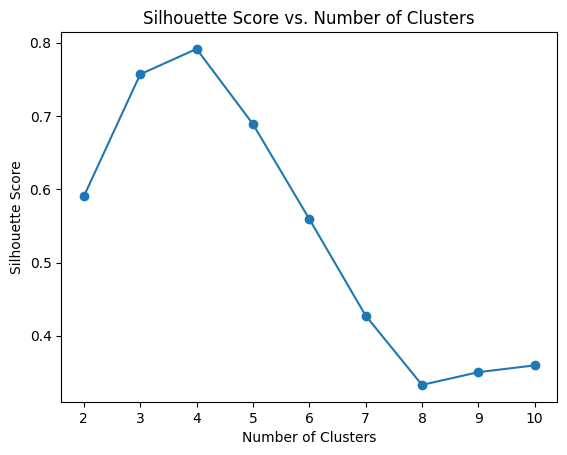

In [ ]:
from sklearn.metrics import silhouette_score

# Create a list to store silhouette scores
silhouette_scores = []

# Apply K-Means clustering for clusters ranging from 2 to 10
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Calculate silhouette score and append it to the list
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


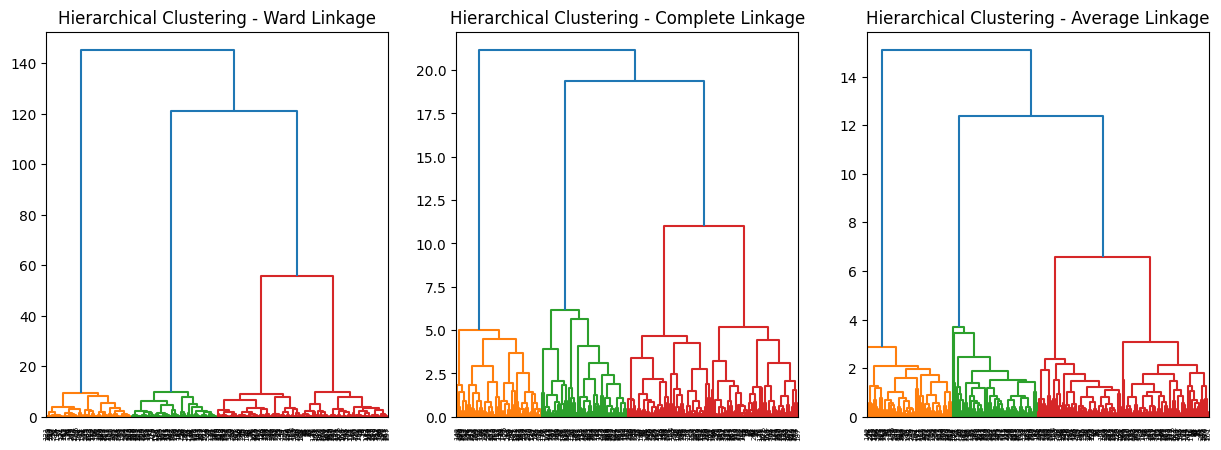

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

# Apply hierarchical clustering
linkage_methods = ['ward', 'complete', 'average']
dendrogram_data = {}

for linkage_method in linkage_methods:
    linkage_matrix = linkage(X, method=linkage_method)
    dendrogram_data[linkage_method] = linkage_matrix

# Visualize the clusters formed using various linkages using dendrograms
plt.figure(figsize=(15, 5))

for i, linkage_method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)
    dendrogram(dendrogram_data[linkage_method], labels=None)
    plt.title(f'Hierarchical Clustering - {linkage_method.capitalize()} Linkage')

plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Assuming X and y are your feature matrix and target variable
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')


Cross-Validation Scores: [1.         0.98333333 1.         0.98333333 1.        ]
Mean CV Accuracy: 0.9933333333333334


In [ ]:
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i} Accuracy: {score:.4f}')

Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 0.9833
Fold 3 Accuracy: 1.0000
Fold 4 Accuracy: 0.9833
Fold 5 Accuracy: 1.0000


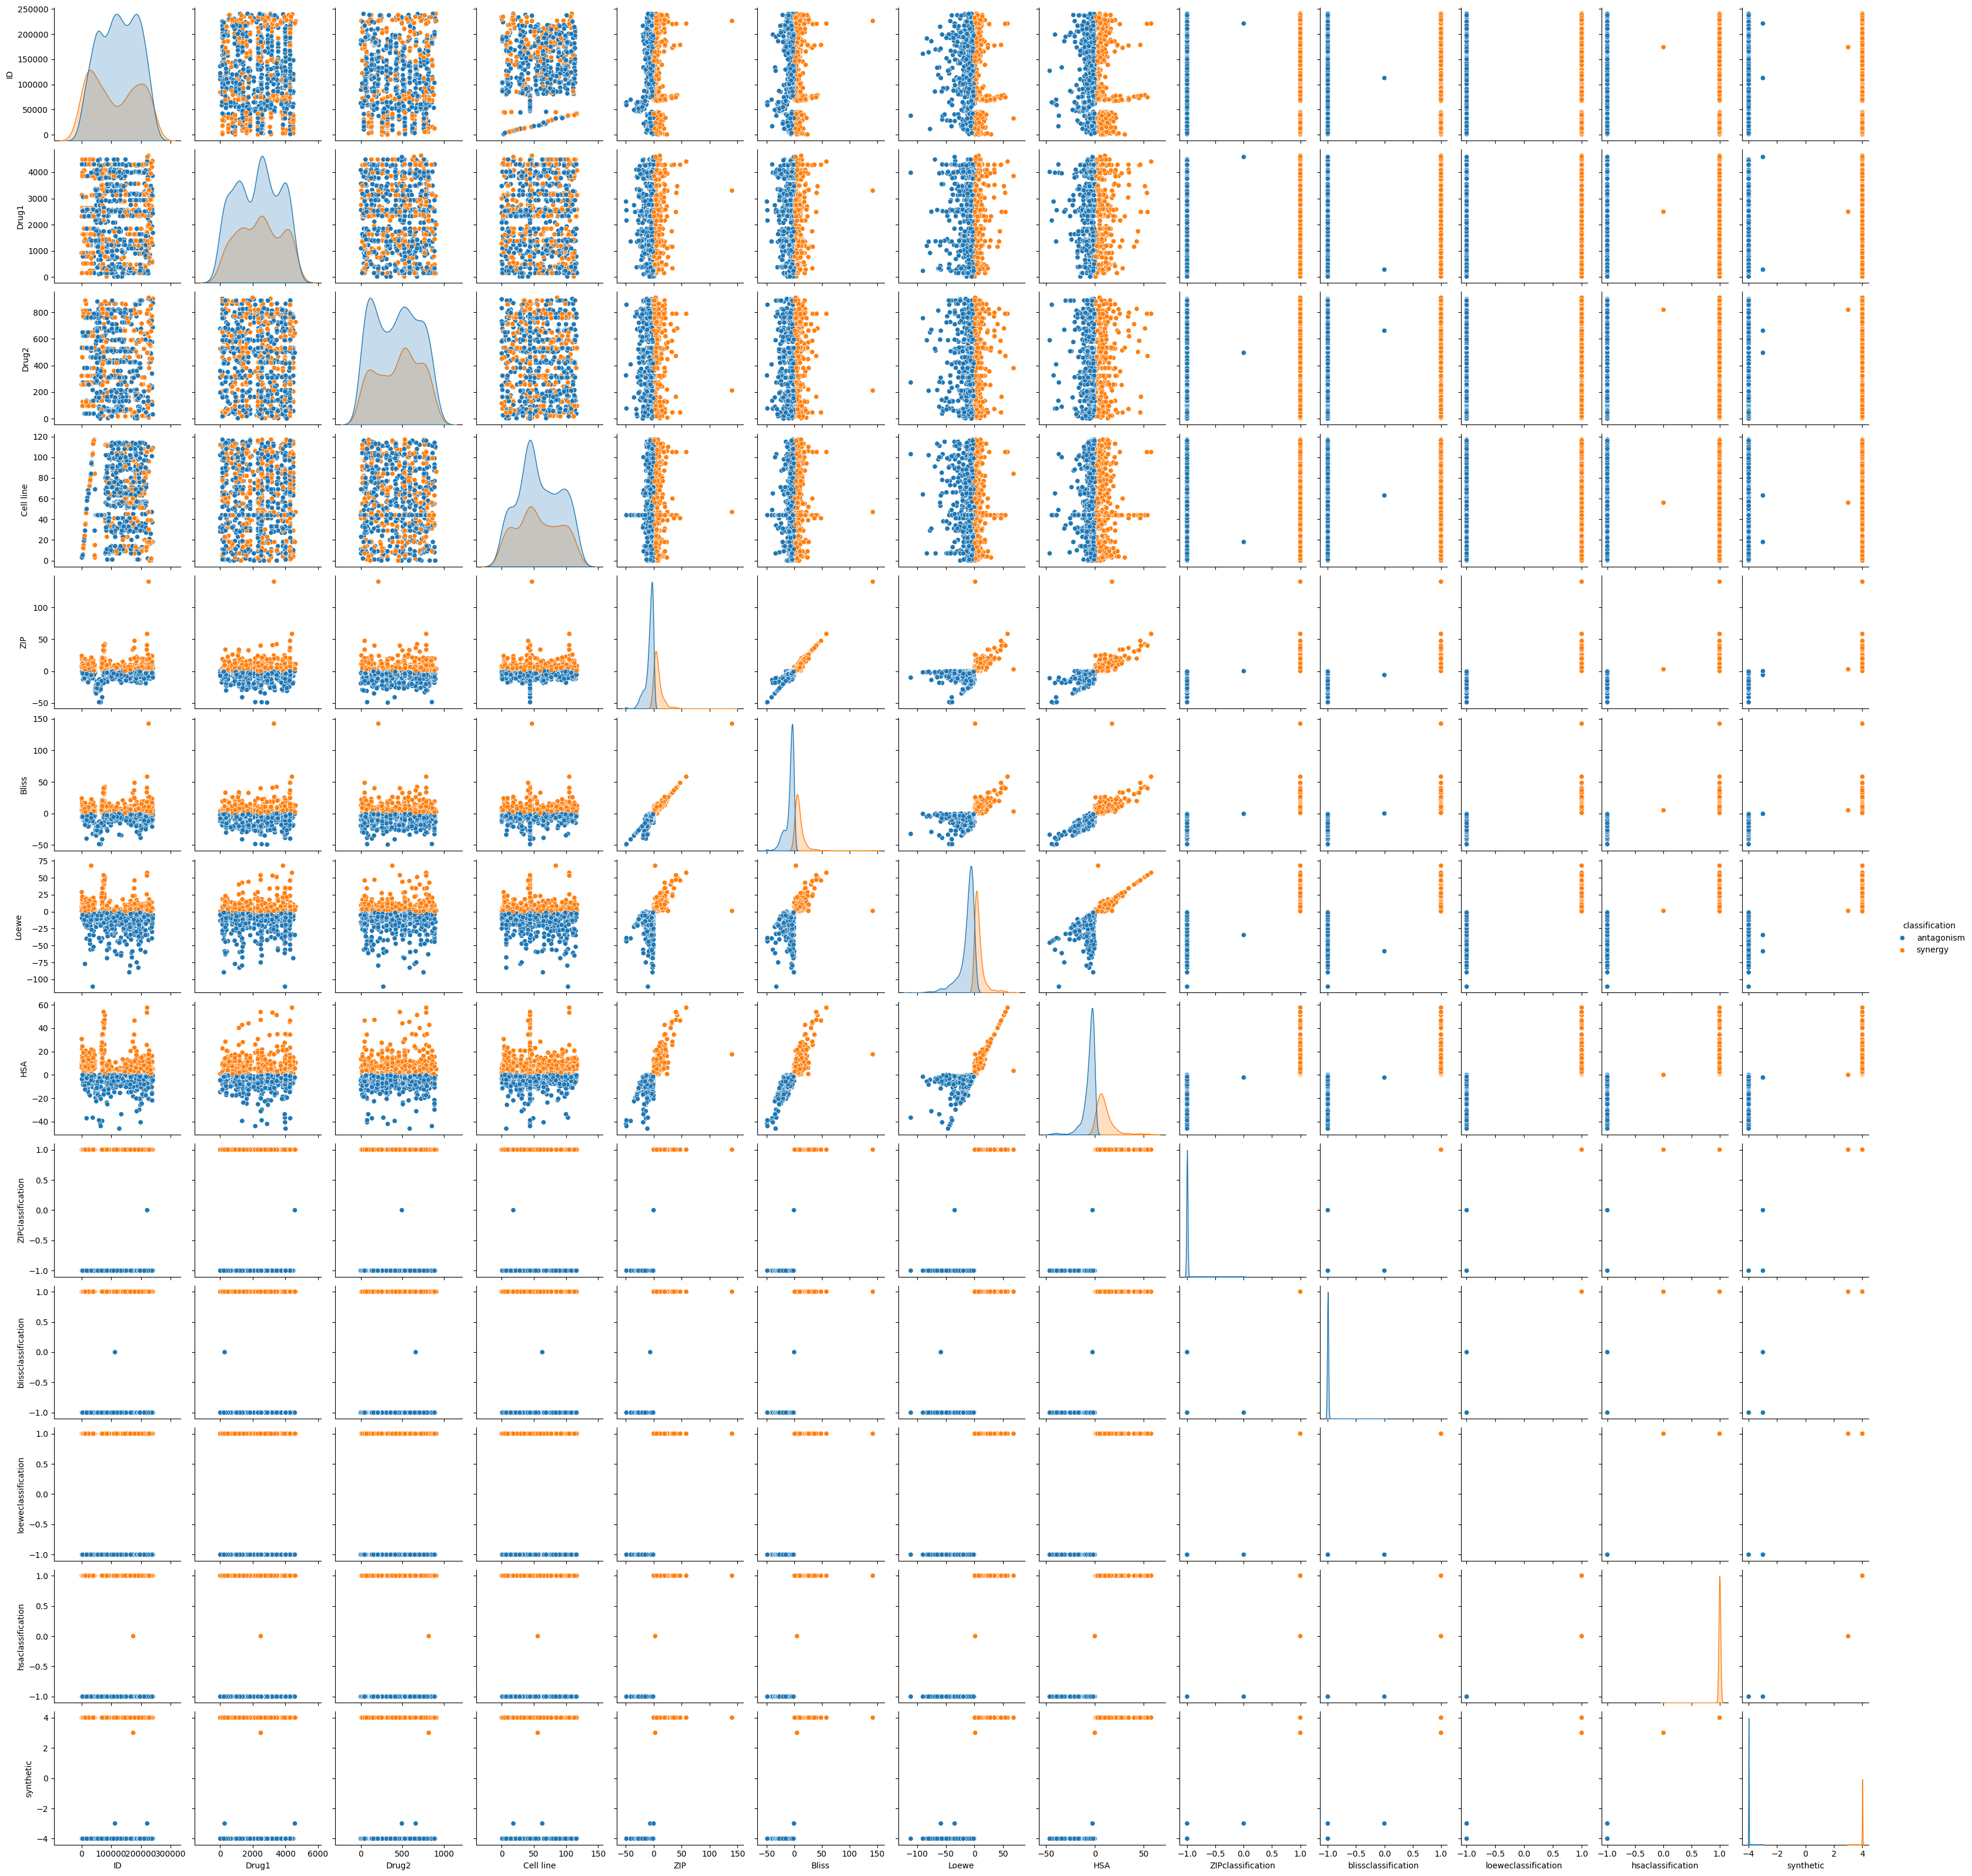

In [ ]:
# Sample 1000 rows from the dataset
sampled_data = data.sample(n=1000)

# Create a pairplot with hue='classification'
sns.pairplot(sampled_data, hue='classification')

# Show the plot
plt.show()


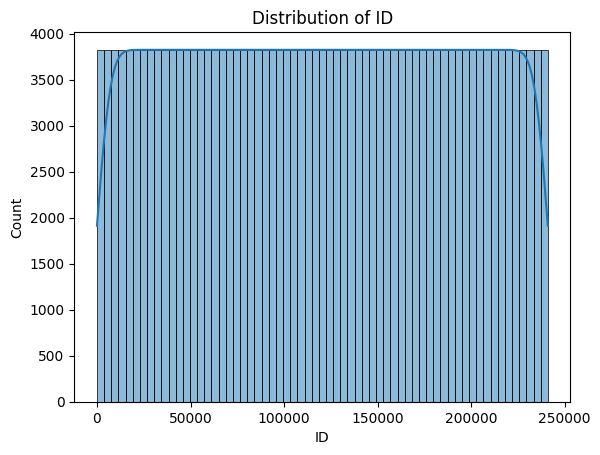

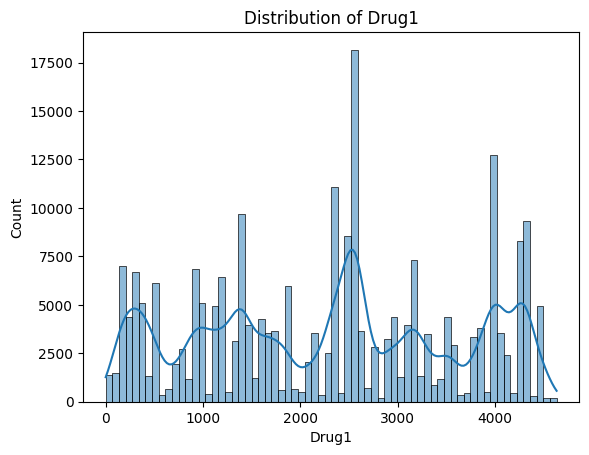

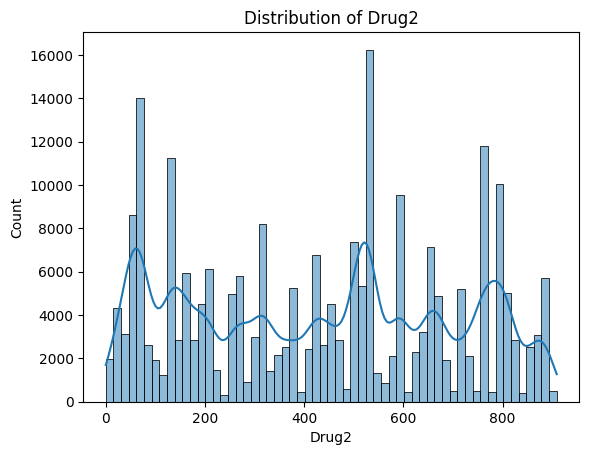

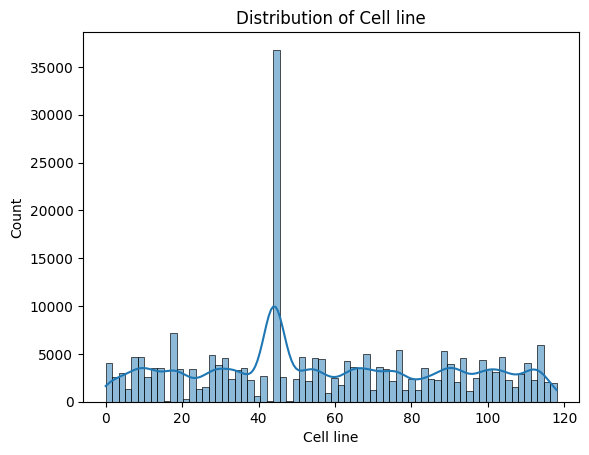

In [ ]:

# Distribution Plots
for feature in data.columns:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

<ipython-input-7-1ce4f6251af0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


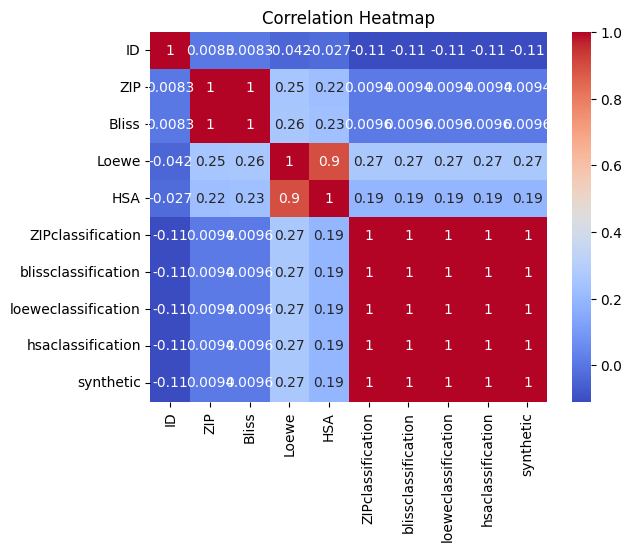

In [ ]:

# Correlation Heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

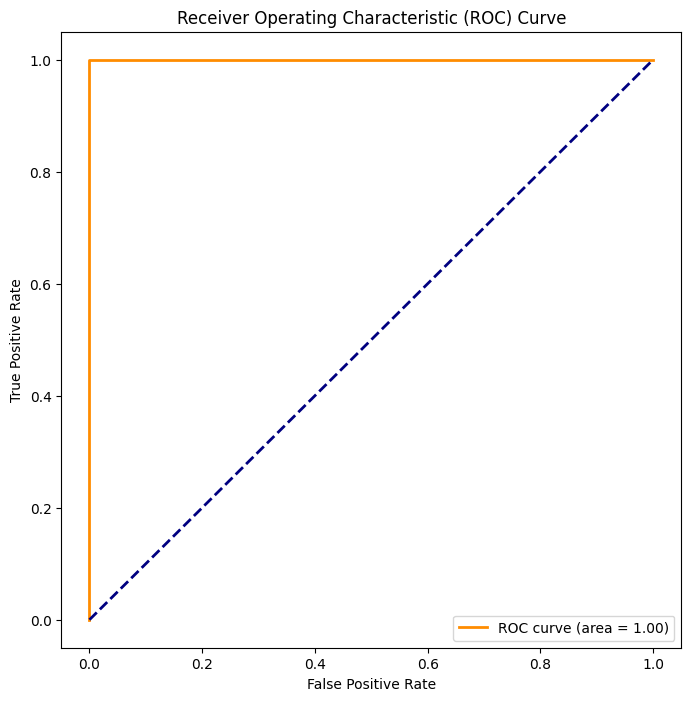

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'antagonism' is mapped to 0 and 'synergy' is mapped to 1
y_test_binary = (y_test == 'synergy').astype(int)

# Get the predicted probabilities for the positive class
y_prob = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


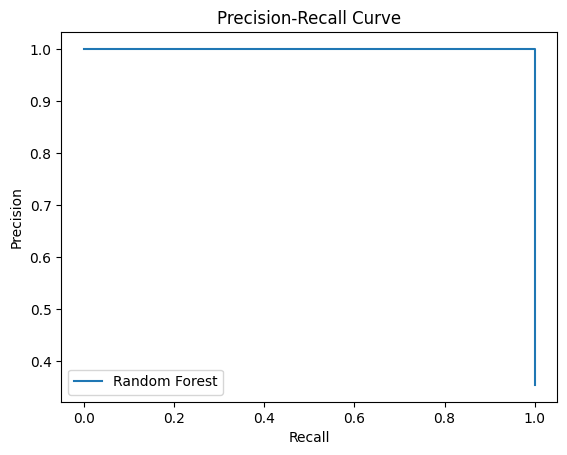

In [ ]:
# Import necessary libraries
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming 'antagonism' is mapped to 0 and 'synergy' is mapped to 1
y_test_binary = (y_test == 'synergy').astype(int)

# Get the predicted probabilities for the positive class
y_prob = rf_clf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_prob)

# Plot Precision-Recall curve
plt.plot(recall, precision, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


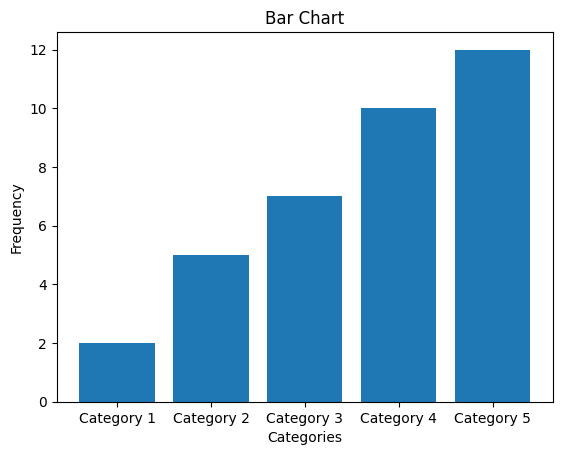

In [ ]:
# Data for the bar chart
data = [2, 5, 7, 10, 12]
labels = ["Category 1", "Category 2", "Category 3", "Category 4", "Category 5"]

# Create the bar chart
plt.bar(labels, data)

# Add a title and labels
plt.title("Bar Chart")
plt.xlabel("Categories")
plt.ylabel("Frequency")

# Show the bar chart
plt.show()

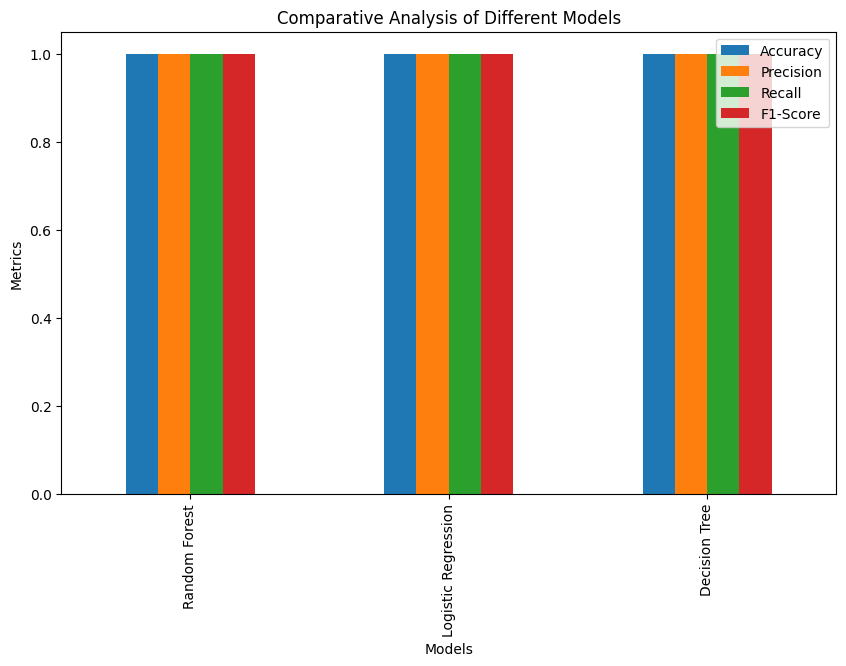

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Function for comparative analysis
def compare_models(y_true, y_preds):
    model_names = list(y_preds.keys())

    # Dictionary to store metrics for each model
    metrics_dict = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

    for model_name, y_pred in y_preds.items():
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')

        metrics_dict['Accuracy'].append(accuracy)
        metrics_dict['Precision'].append(precision)
        metrics_dict['Recall'].append(recall)
        metrics_dict['F1-Score'].append(f1)

    # Create a DataFrame for comparative analysis
    metrics_df = pd.DataFrame(metrics_dict, index=model_names)

    # Plot the comparative analysis
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Comparative Analysis of Different Models')
    plt.xlabel('Models')
    plt.ylabel('Metrics')
    plt.show()

# Dictionary to store predictions of each model
y_preds = {
    'Random Forest': y_pred_best_rf,
    'Logistic Regression': y_pred_best_lr,
    'Decision Tree': y_pred_dt
}

# Compare models
compare_models(y_test, y_preds)
